# **Bangkit Capstone Project**

Theme => Economic Resilience

Main Goal => Provide cloud service which can forecast future sales for each product, this service is for MSME(especially for MSME in culinary business) by using 1 of 3 learning algorithms below :
1. LSTM
2. XGBoost
3. Multiple Regression

Purpose => The purpose of this service is to reduce dead stock which can happen because of the mismatch between demand and available product, so by reducing dead stock hope that it can make the restocking process more efficient.

Dataset => The dataset which used in this notebook can be accessed using the link below :

https://www.kaggle.com/ghoshsaptarshi/av-genpact-hack-dec2018

## **Acquiring Dataset**

** Notes : Dataset acquired using API token download feature in the kaggle.com, please upload your Kaggle API token to the google colaboratory VM first!

In [1]:
! chmod 600 kaggle.json

In [2]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download ghoshsaptarshi/av-genpact-hack-dec2018

av-genpact-hack-dec2018.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
! mkdir datasets

mkdir: cannot create directory ‘datasets’: File exists


In [4]:
import zipfile
with zipfile.ZipFile('av-genpact-hack-dec2018.zip','r') as f:
  f.extractall('/content/datasets/')

## **Data Preparation & Preprocessing**

### **Importing all necessary library for data preparation and preprocessing**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

### **Loading dataset into DataFrame Pandas**

In [6]:
train_df = pd.read_csv('/content/datasets/train.csv')

In [7]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [8]:
meal_info = pd.read_csv('/content/datasets/meal_info.csv')

In [9]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [10]:
fulfillment_center_df = pd.read_csv('/content/datasets/fulfilment_center_info.csv')

In [11]:
fulfillment_center_df

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [12]:
test_df = pd.read_csv('/content/datasets/test.csv')

In [13]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


### **Merging DataFrame which has subset**

In [14]:
train_df = pd.merge(train_df,meal_info, on='meal_id',how='inner')

In [15]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...
456543,1458599,145,65,2104,582.03,582.03,0,0,134,Fish,Continental
456544,1417199,145,110,2104,582.03,581.03,0,0,28,Fish,Continental
456545,1434028,145,68,2104,582.03,581.03,0,0,40,Fish,Continental
456546,1205895,145,51,2104,641.23,640.23,0,0,69,Fish,Continental


In [16]:
train_df = pd.merge(train_df, fulfillment_center_df, on='center_id',how='inner')

In [17]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [18]:
test_df = pd.merge(test_df, meal_info, on='meal_id',how='inner')

In [19]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai
1,1460444,146,24,1885,158.11,160.11,0,1,Beverages,Thai
2,1098228,146,11,1885,158.17,157.17,0,0,Beverages,Thai
3,1316160,146,83,1885,142.59,143.59,0,0,Beverages,Thai
4,1390579,146,32,1885,122.28,121.28,0,0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...
32568,1220126,155,43,2104,678.03,680.03,0,0,Fish,Continental
32569,1201456,155,65,2104,678.03,680.03,0,0,Fish,Continental
32570,1259792,155,110,2104,679.03,679.03,0,0,Fish,Continental
32571,1283607,155,68,2104,679.03,680.03,0,0,Fish,Continental


In [20]:
test_df = pd.merge(test_df, fulfillment_center_df, on='center_id',how='inner')

In [21]:
test_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32568,1412025,146,61,2104,583.03,581.03,0,0,Fish,Continental,473,77,TYPE_A,4.5
32569,1287019,147,61,2104,582.03,582.03,0,1,Fish,Continental,473,77,TYPE_A,4.5
32570,1396176,149,61,2104,629.53,629.53,0,0,Fish,Continental,473,77,TYPE_A,4.5
32571,1331977,150,61,2104,629.53,629.53,0,0,Fish,Continental,473,77,TYPE_A,4.5


### **Data Preparation**

In [22]:
train_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


**Checking Data Types**

In [23]:
train_df.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
category                  object
cuisine                   object
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
dtype: object

**Remove Unnecessary Feature**

In [24]:
train_df.drop(columns=['id','center_id','meal_id'],axis=1, inplace=True)

In [25]:
train_df

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
456543,141,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,142,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,143,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,144,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


### **Exploratory Data Analysis (EDA)**

**Checking Unique Values In 'center_type' Feature**

In [26]:
train_df['center_type'].unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

**Separating Each 'center_type' Into Another DataFrame**

In [27]:
center_a = train_df[train_df['center_type'] == 'TYPE_A']

In [28]:
center_b = train_df[train_df['center_type'] == 'TYPE_B']

In [29]:
center_c = train_df[train_df['center_type'] == 'TYPE_C']

**Looking at the Detail 'center_type' DataFrame**

In [30]:
center_a

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
10379,1,136.83,136.83,0,0,959,Beverages,Thai,679,56,TYPE_A,3.7
10380,2,133.86,135.86,0,0,1054,Beverages,Thai,679,56,TYPE_A,3.7
10381,3,135.86,133.86,0,0,891,Beverages,Thai,679,56,TYPE_A,3.7
10382,4,134.86,135.86,0,0,1107,Beverages,Thai,679,56,TYPE_A,3.7
10383,5,146.53,146.53,0,0,919,Beverages,Thai,679,56,TYPE_A,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...
456543,141,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,142,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,143,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,144,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


In [31]:
center_b

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
5146,1,136.83,136.83,0,0,1498,Beverages,Thai,614,85,TYPE_B,3.6
5147,2,135.86,134.86,0,0,1176,Beverages,Thai,614,85,TYPE_B,3.6
5148,3,135.83,136.83,0,0,1444,Beverages,Thai,614,85,TYPE_B,3.6
5149,4,134.83,136.83,0,0,1297,Beverages,Thai,614,85,TYPE_B,3.6
5150,30,121.28,121.28,0,0,890,Beverages,Thai,614,85,TYPE_B,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...
443808,141,597.52,597.52,0,0,40,Fish,Continental,676,34,TYPE_B,4.1
443809,142,581.03,582.03,0,0,26,Fish,Continental,676,34,TYPE_B,4.1
443810,143,581.03,582.03,0,0,80,Fish,Continental,676,34,TYPE_B,4.1
443811,144,582.03,582.03,0,0,81,Fish,Continental,676,34,TYPE_B,4.1


In [32]:
center_c

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437881,125,583.03,582.03,0,0,13,Fish,Continental,699,85,TYPE_C,4.0
437882,130,436.53,581.03,1,0,27,Fish,Continental,699,85,TYPE_C,4.0
437883,137,630.53,630.53,0,0,14,Fish,Continental,699,85,TYPE_C,4.0
437884,138,629.53,631.53,0,0,15,Fish,Continental,699,85,TYPE_C,4.0


**Checking correlation between Features on sample DataFrame('center_a' DataFrame)**

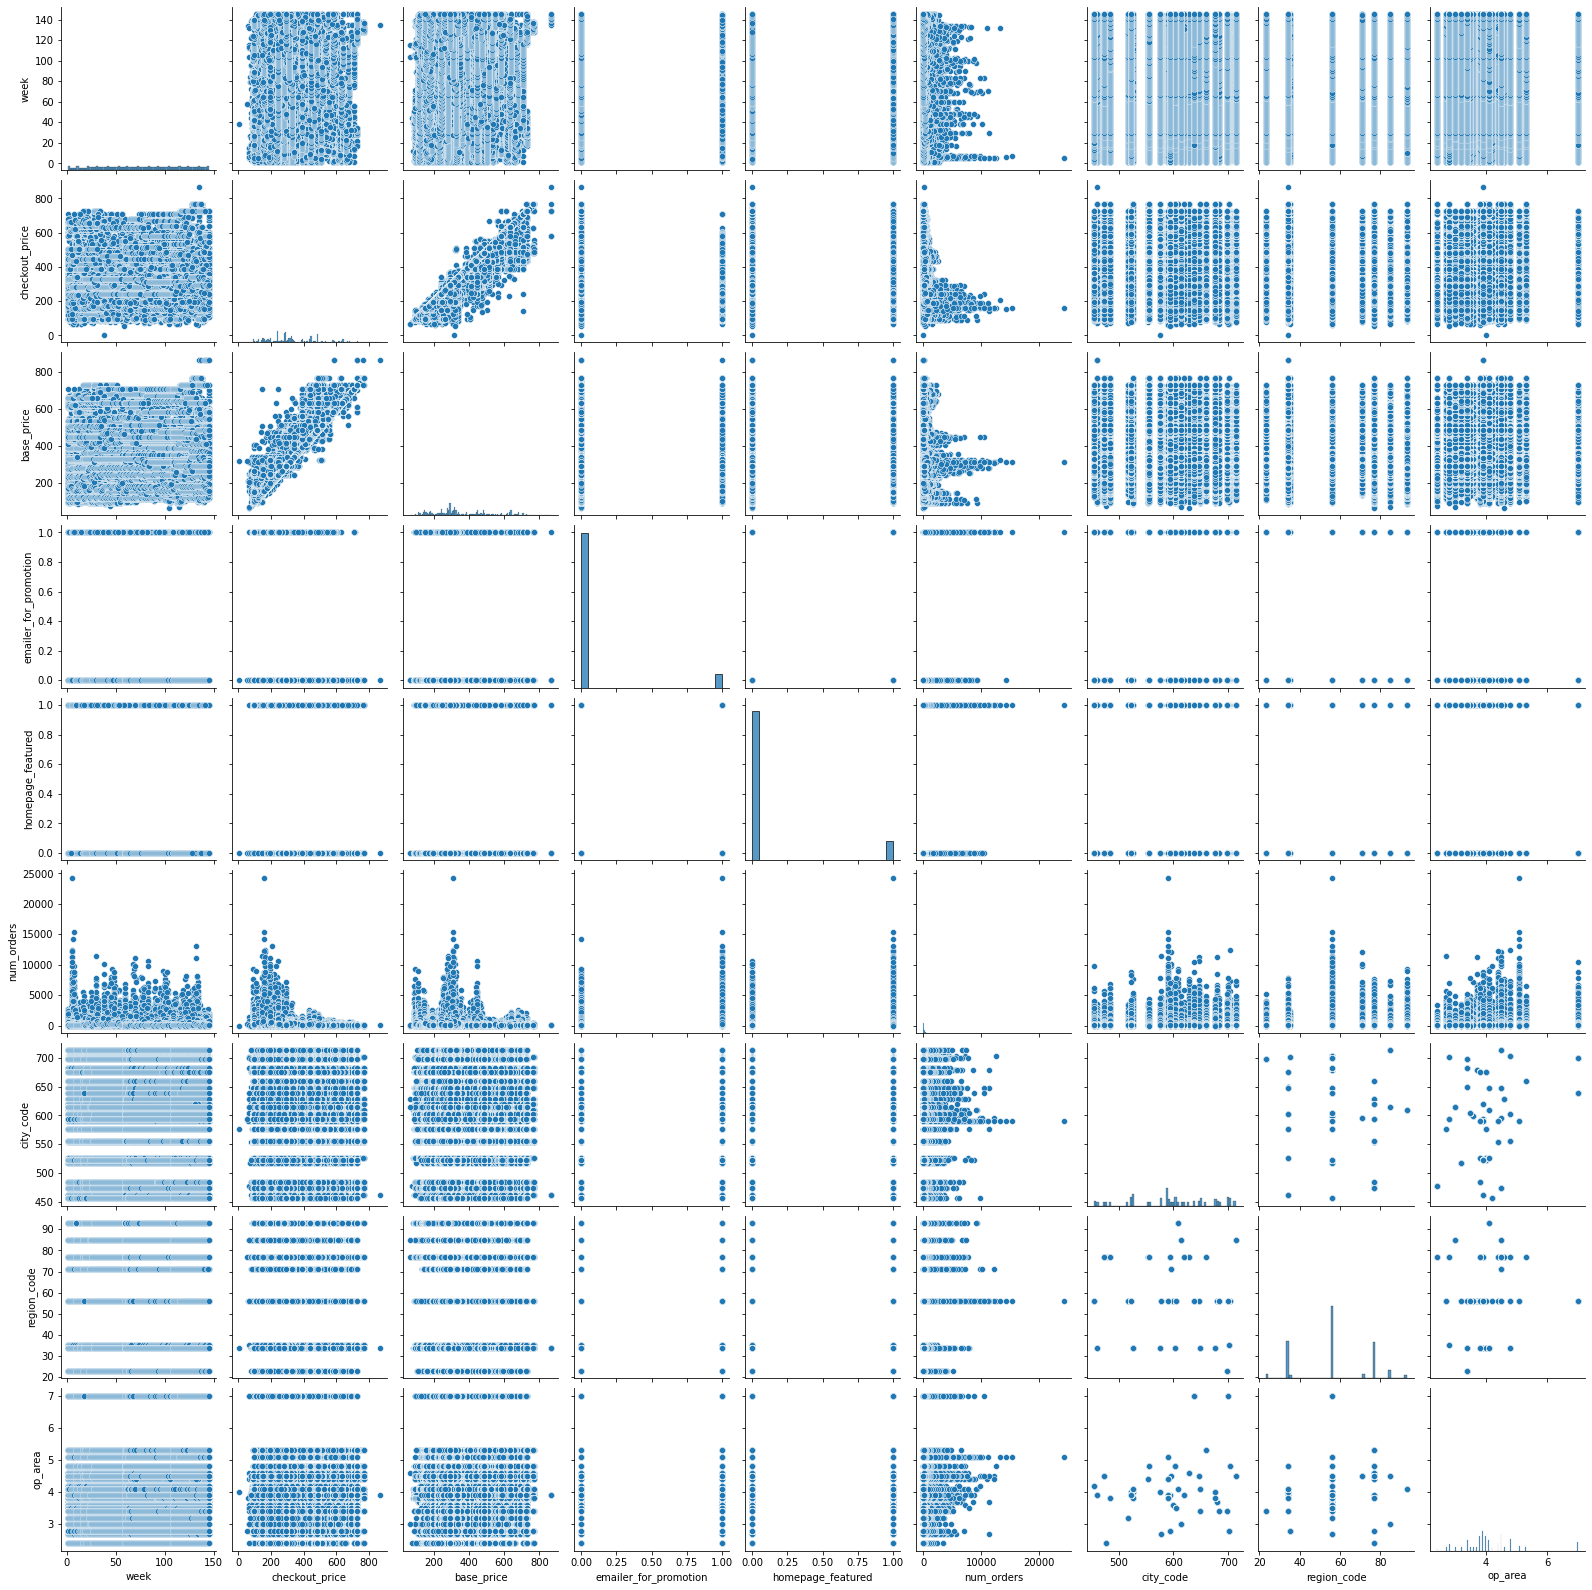

In [33]:
sns.pairplot(center_a)

-- Assumption --

From that pairplot, especially when we looks at correlation between 'base_price','checkout_price','num_orders', we can conclude that if :
1. 'base_price' low -> 'checkout_price' will be low
2. 'checkout_price' low -> 'num_orders' will be high
3. Using email for promotion('emailer_for_promotion' feature) and set products in the homepage('homepage_featured' feature) affect for increasing up to 5000 order in the 'num_orders' feature
4. Area of operation at fulfillment center did not affect orders in the 'num_orders' feature

**Looking at detail values inside 'cuisine' feature at sampe DataFrame ('center_a' DataFrame)**

In [34]:
center_a['cuisine'].unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [35]:
center_a_Thai = center_a[center_a['cuisine'] == 'Thai']

In [36]:
center_a_Indian = center_a[center_a['cuisine'] == 'Indian']

In [37]:
center_a_Italian = center_a[center_a['cuisine'] == 'Italian']

In [38]:
center_a_Continental = center_a[center_a['cuisine'] == 'Continental']

In [39]:
center_a_Thai.drop(columns=['city_code','region_code','op_area'],axis=1,inplace=True)
center_a_Thai

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
10379,1,136.83,136.83,0,0,959,Beverages,Thai,TYPE_A
10380,2,133.86,135.86,0,0,1054,Beverages,Thai,TYPE_A
10381,3,135.86,133.86,0,0,891,Beverages,Thai,TYPE_A
10382,4,134.86,135.86,0,0,1107,Beverages,Thai,TYPE_A
10383,5,146.53,146.53,0,0,919,Beverages,Thai,TYPE_A
...,...,...,...,...,...,...,...,...,...
455738,141,261.93,262.93,0,0,82,Other Snacks,Thai,TYPE_A
455739,142,261.93,261.93,0,0,109,Other Snacks,Thai,TYPE_A
455740,143,260.93,260.93,0,0,41,Other Snacks,Thai,TYPE_A
455741,144,183.36,260.93,0,0,42,Other Snacks,Thai,TYPE_A


In [40]:
center_a_Thai['category'].unique()

array(['Beverages', 'Starters', 'Extras', 'Other Snacks', 'Soup'],
      dtype=object)

In [41]:
center_a_Thai[center_a_Thai['category'] == 'Beverages']

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
10379,1,136.83,136.83,0,0,959,Beverages,Thai,TYPE_A
10380,2,133.86,135.86,0,0,1054,Beverages,Thai,TYPE_A
10381,3,135.86,133.86,0,0,891,Beverages,Thai,TYPE_A
10382,4,134.86,135.86,0,0,1107,Beverages,Thai,TYPE_A
10383,5,146.53,146.53,0,0,919,Beverages,Thai,TYPE_A
...,...,...,...,...,...,...,...,...,...
451123,141,121.25,123.25,0,0,95,Beverages,Thai,TYPE_A
451124,142,121.25,121.25,0,0,55,Beverages,Thai,TYPE_A
451125,143,118.37,117.37,0,0,80,Beverages,Thai,TYPE_A
451126,144,120.28,122.28,0,0,121,Beverages,Thai,TYPE_A


In [42]:
center_a_Thai_Bev = center_a_Thai[center_a_Thai['category'] == 'Beverages']

**Looking at every range of week's in the 'center_a_Thai_Bev' DataFrame**

In [43]:
center_a_visualization = center_a_Thai_Bev.iloc[0:145]
center_a_visualization

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
10379,1,136.83,136.83,0,0,959,Beverages,Thai,TYPE_A
10380,2,133.86,135.86,0,0,1054,Beverages,Thai,TYPE_A
10381,3,135.86,133.86,0,0,891,Beverages,Thai,TYPE_A
10382,4,134.86,135.86,0,0,1107,Beverages,Thai,TYPE_A
10383,5,146.53,146.53,0,0,919,Beverages,Thai,TYPE_A
...,...,...,...,...,...,...,...,...,...
10519,141,151.38,149.38,0,0,1431,Beverages,Thai,TYPE_A
10520,142,149.38,149.38,0,0,1297,Beverages,Thai,TYPE_A
10521,143,149.38,149.38,0,0,1444,Beverages,Thai,TYPE_A
10522,144,150.41,148.41,0,0,1621,Beverages,Thai,TYPE_A


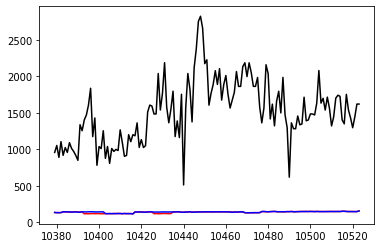

In [44]:
plt.plot(
    center_a_visualization.index,
    center_a_visualization['checkout_price'],
    color='red'
)
plt.plot(
    center_a_visualization.index,
    center_a_visualization['base_price'],
    color='blue'
)
plt.plot(
    center_a_visualization.index,
    center_a_visualization['num_orders'],
    color='black'
)
plt.show()

In [45]:
center_a_visualization = center_a_Thai_Bev.iloc[145:290]
center_a_visualization

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
10524,1,133.89,133.89,0,0,1052,Beverages,Thai,TYPE_A
10525,2,135.86,133.86,0,0,1000,Beverages,Thai,TYPE_A
10526,3,134.89,134.89,0,0,852,Beverages,Thai,TYPE_A
10527,4,132.89,133.89,0,0,755,Beverages,Thai,TYPE_A
10528,5,144.53,144.53,0,0,998,Beverages,Thai,TYPE_A
...,...,...,...,...,...,...,...,...,...
10664,141,148.41,148.41,0,0,1026,Beverages,Thai,TYPE_A
10665,142,151.38,151.38,0,0,1068,Beverages,Thai,TYPE_A
10666,143,148.44,148.44,0,0,730,Beverages,Thai,TYPE_A
10667,144,151.38,150.38,0,0,971,Beverages,Thai,TYPE_A


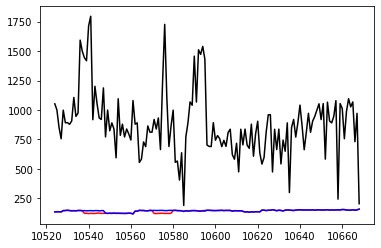

In [46]:
plt.plot(
    center_a_visualization.index,
    center_a_visualization['checkout_price'],
    color='red'
)
plt.plot(
    center_a_visualization.index,
    center_a_visualization['base_price'],
    color='blue'
)
plt.plot(
    center_a_visualization.index,
    center_a_visualization['num_orders'],
    color='black'
)
plt.show()

In [47]:
center_a_visualization = center_a_Thai_Bev.iloc[290:435]
center_a_visualization

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
10669,1,133.86,135.86,0,0,379,Beverages,Thai,TYPE_A
10670,2,135.86,135.86,0,0,325,Beverages,Thai,TYPE_A
10671,3,136.83,135.83,0,0,284,Beverages,Thai,TYPE_A
10672,4,132.89,133.89,0,0,418,Beverages,Thai,TYPE_A
10673,5,144.53,145.53,0,0,391,Beverages,Thai,TYPE_A
...,...,...,...,...,...,...,...,...,...
10809,141,149.41,148.41,0,0,539,Beverages,Thai,TYPE_A
10810,142,149.38,150.38,0,0,405,Beverages,Thai,TYPE_A
10811,143,150.41,149.41,0,0,514,Beverages,Thai,TYPE_A
10812,144,151.38,150.38,0,0,352,Beverages,Thai,TYPE_A


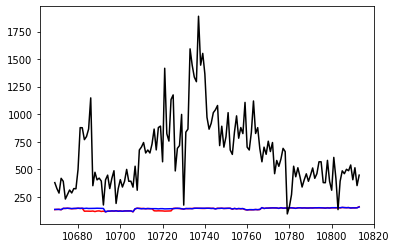

In [48]:
plt.plot(
    center_a_visualization.index,
    center_a_visualization['checkout_price'],
    color='red'
)
plt.plot(
    center_a_visualization.index,
    center_a_visualization['base_price'],
    color='blue'
)
plt.plot(
    center_a_visualization.index,
    center_a_visualization['num_orders'],
    color='black'
)
plt.show()

In [49]:
center_a_visualization = center_a_Thai_Bev.iloc[18329:]
center_a_visualization

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,center_type
450983,1,119.31,119.31,0,0,176,Beverages,Thai,TYPE_A
450984,2,97.06,119.31,1,0,554,Beverages,Thai,TYPE_A
450985,3,99.00,120.31,0,0,352,Beverages,Thai,TYPE_A
450986,4,120.31,119.31,0,0,285,Beverages,Thai,TYPE_A
450987,5,120.28,120.28,0,0,311,Beverages,Thai,TYPE_A
...,...,...,...,...,...,...,...,...,...
451123,141,121.25,123.25,0,0,95,Beverages,Thai,TYPE_A
451124,142,121.25,121.25,0,0,55,Beverages,Thai,TYPE_A
451125,143,118.37,117.37,0,0,80,Beverages,Thai,TYPE_A
451126,144,120.28,122.28,0,0,121,Beverages,Thai,TYPE_A


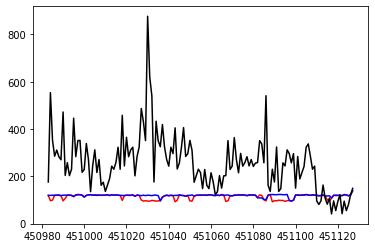

In [50]:
plt.plot(
    center_a_visualization.index,
    center_a_visualization['checkout_price'],
    color='red'
)
plt.plot(
    center_a_visualization.index,
    center_a_visualization['base_price'],
    color='blue'
)
plt.plot(
    center_a_visualization.index,
    center_a_visualization['num_orders'],
    color='black'
)
plt.show()

**Using last 145 data from the 'center_a' DataFrame**

In [51]:
train_data = center_a_Thai_Bev.iloc[18329:]

### **Data Preprocessing**

**Removing Unnecessary Feature in the 'train_data' DataFrame**

In [52]:
train_data.drop(columns=['emailer_for_promotion','homepage_featured','category','cuisine','center_type'],axis=1, inplace=True)
train_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,week,checkout_price,base_price,num_orders
450983,1,119.31,119.31,176
450984,2,97.06,119.31,554
450985,3,99.00,120.31,352
450986,4,120.31,119.31,285
450987,5,120.28,120.28,311
...,...,...,...,...
451123,141,121.25,123.25,95
451124,142,121.25,121.25,55
451125,143,118.37,117.37,80
451126,144,120.28,122.28,121


**Making 'week' feature as an index of 'train_data' DataFrame**

In [53]:
train_data.set_index('week',inplace=True)
train_data

,checkout_price,base_price,num_orders
week,,,
1,119.31,119.31,176
2,97.06,119.31,554
3,99.00,120.31,352
4,120.31,119.31,285
5,120.28,120.28,311
...,...,...,...
141,121.25,123.25,95
142,121.25,121.25,55
143,118.37,117.37,80


**Normalizing Data in the 'train_data' DataFrame**

In [54]:
scaler = MinMaxScaler()

In [55]:
train_data = scaler.fit_transform(train_data)

In [56]:
train_data

array([[5.95744681e-01, 5.42441209e-01, 1.61483254e-01],
       [1.07699057e-01, 5.42441209e-01, 6.13636364e-01],
       [1.50252248e-01, 5.64837626e-01, 3.72009569e-01],
       [6.17679316e-01, 5.42441209e-01, 2.91866029e-01],
       [6.17021277e-01, 5.64165733e-01, 3.22966507e-01],
       [5.95744681e-01, 5.87234043e-01, 2.89473684e-01],
       [5.74468085e-01, 5.20716685e-01, 2.73923445e-01],
       [8.57644220e-02, 5.65509518e-01, 5.15550239e-01],
       [3.19806975e-01, 5.65509518e-01, 1.94976077e-01],
       [6.17021277e-01, 5.64165733e-01, 2.59569378e-01],
       [6.17679316e-01, 5.87234043e-01, 1.93779904e-01],
       [6.18337355e-01, 5.20716685e-01, 2.26076555e-01],
       [4.68085106e-01, 4.56886898e-01, 4.84449761e-01],
       [6.17679316e-01, 5.87234043e-01, 2.89473684e-01],
       [6.38297872e-01, 6.30683091e-01, 3.70813397e-01],
       [6.60890546e-01, 6.08958567e-01, 3.72009569e-01],
       [6.17021277e-01, 5.64165733e-01, 2.10526316e-01],
       [4.25531915e-01, 3.91041

In [57]:
train_data = pd.DataFrame(train_data,columns=['checkout_price','base_price','num_orders'])

In [58]:
train_data

,checkout_price,base_price,num_orders
0,0.595745,0.542441,0.161483
1,0.107699,0.542441,0.613636
2,0.150252,0.564838,0.372010
3,0.617679,0.542441,0.291866
4,0.617021,0.564166,0.322967
...,...,...,...
140,0.638298,0.630683,0.064593
141,0.638298,0.585890,0.016746
142,0.575126,0.498992,0.046651
143,0.617021,0.608959,0.095694


**Separating 'train_data' into train set & validation set**

In [59]:
train_set = train_data[:120]

In [60]:
train_set

,checkout_price,base_price,num_orders
0,0.595745,0.542441,0.161483
1,0.107699,0.542441,0.613636
2,0.150252,0.564838,0.372010
3,0.617679,0.542441,0.291866
4,0.617021,0.564166,0.322967
...,...,...,...
115,0.086422,0.000000,0.258373
116,0.149594,0.086898,0.305024
117,0.617679,0.587234,0.130383
118,0.660891,0.564166,0.290670


In [61]:
val_set = train_data[120:]

In [62]:
val_set

,checkout_price,base_price,num_orders
120,0.617679,0.587234,0.209330
121,0.595745,0.587234,0.240431
122,0.660233,0.630683,0.337321
123,0.617021,0.586562,0.354067
124,0.617679,0.542441,0.291866
125,0.617021,0.608959,0.226077
126,0.618337,0.565510,0.241627
127,0.639614,0.542441,0.065789
128,0.575126,0.498992,0.047847
129,0.553191,0.543785,0.065789


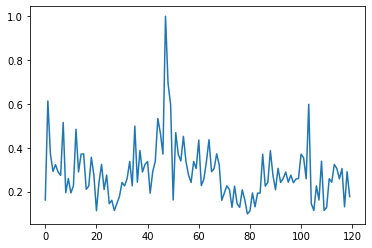

In [63]:
plt.plot(
    train_set.index,
    train_set['num_orders']
)
plt.show()

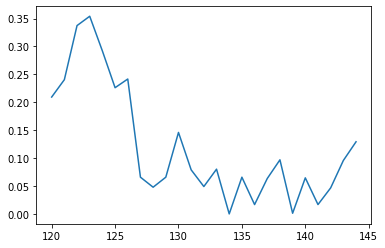

In [64]:
plt.plot(
    val_set.index,
    val_set['num_orders']
)
plt.show()